# Quant Course: Lesson 1


## Brownian motion and Stochastic integrals




### Assets and self-financing strategies


Money that is not needed for immediate consumption must be stored for later use. It may be kept in the form:
- cash
- savings account
- invested in government bond, corporate bonds, stock, etc.

Any item that can be used to store value will be referred to as an **asset**. Some assets are safe
in the sense that their future value can be predicted quite accurately; other assets
are risky and may bring large gains or severe losses.




It is convenient to use the following
assumptions:
1. Assets are measured in units; the price of an asset refers to the price per unit
2. The value of a combination of assets - **portfolio** is the sum of the values of its constituent parts
3. Assets can be traded freely, without transaction costs, at any time and in any quantity
4. The price process is not impacted by the investor’s trades
5. Holding a fixed quantity of an asset brings no costs or dividends


A **portfolio (strategy)** is the number units of asset at time $t$:

$$\phi_t= (\phi_t^1, \dots, \phi_t^m)$$



According to 1. and 2., the **value of the portfolio (wealth of the investor)** at any given time $t$:

$$ Y_t = \sum_{i=1}^m \phi_t^i S_t^i $$
    
where $i=1, \dots m$ is an index used to distinguish different assets and $S_t^i$ is the price per unit of asset $i$ at time $t$.



A portfolio is **self-financing** if the investor does not take out money from, and does not invest money to the portfolio after time 0. This is equivalent to:

$$ Y_{t_{j+1}}  = Y_{t_j} + \sum_{i=1}^m \phi_{t_j}^i (S_{t_{j+1}}^i - S_{t_j}^i)$$

In words, this says that the portfolio value at time $t_{j+1}$ is equal to the value at
time $t_j$ plus the gains or losses that have been realized on the assets that constitute
the portfolio.



If we want to monitor the value process of the portfolio thorugh a time interval $[0, T]$:

- In discrete time taking $n$ steps:
   
$$ Y_T = Y_0 + \sum_{j=0}^n \phi_{t_j}^T \Delta S_{t_j} $$
    
 where $\Delta$ is the forward difference operator.


- In case of continuous time:

$$ Y_T = Y_0 + \int_0^T \phi_t^T dS_t$$

- In some cases we are able to derive pricing formulas based on arbitrage considerations, without implementing model for the price of the assets. This is possible when we were looking at sufficently simple instruments.






- If we would like to price more complex instruments, for example options and other credit derivatives, we will need a model for the asset price.


#### This model will be based on stochastic processes.

### What is a stochastic process?

Some ideas that capture the essence of stochatis process:
- random evolution
- random function
- random path

Formally : A stochastic process is a family of random variables $X_t$ indexed by a parameter $t$, that can be interpreted as time.

$ X_0,X_1, X_2, X_3,  . . . $



The sample paths of a stochastic process are the actual realized paths that could be followed by a stochastic process.

As an example let's look at the cruid oil prices from 1983 until 2023 September 11th from Trading Economics:

https://tradingeconomics.com/commodity/crude-oil

<div>
<img src="images/crudeoil.jpg" width="800" />
</div>


### Coin tossing

<div>
<img src="images/200ft.png" width="50"
     alt="alt_text" align="righ"/>
</div>

Our first idea is to model the price of an asset with a process that moves up 1 or down by 1 with equal probability. Let's see the behaviour of this process.



The dynamics can be modelled as follows:
1. We start at 0.
2. At time 1, flip a coin. If head, price goes from 0 to 1. If tails, from 0 to -1.
3. At time 2, starting from the new position (+1 or -1) flip the same coin again and move either up or down according to step 2.
4. Repeat for $n$ steps.

Denote the jth move by $X_t$:

$P(X_t=1)=0.5$, $P(X_t=-1)=0.5$ and $S_n=\sum_{t=0}^n X_t$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, IntSlider


def randomwalk1D(n, plot_color='blue', line_style='-'):
    coin = [-1, 1] # Tails and heads
    steps = np.random.choice(coin, size=(1,n))
    path = np.cumsum(steps)
    path = np.concatenate([[0], path])

    plt.plot(path, color=plot_color, linestyle=line_style)
    plt.title("1D Random Walk")
    plt.show()


# HOMEWORK Implementation: Task A
Customizations to Plotter:
1. Custom layout setup and dynamic plot attributes for the randomwalk1D function.
2. Interactive widgets to adjust parameters like the number of steps, color, and line style of the plot dynamically.
3. A function to plot statistical summaries of the random walks.

In [ ]:
@interact
def plot_random_walk(steps=IntSlider(min=100, max=1000, step=100, value=300),
                     color=['blue', 'green', 'red', 'black'],
                     line_style=['-', '--', ':', '-.']):
    randomwalk1D(steps, plot_color=color, line_style=line_style)


interactive(children=(IntSlider(value=300, description='steps', max=1000, min=100, step=100), Dropdown(descrip…

In [ ]:
def plot_statistical_summary(paths, stat_function, title):
    statistics = [stat_function(path) for path in paths]
    plt.plot(statistics)
    plt.title(title)
    plt.show()


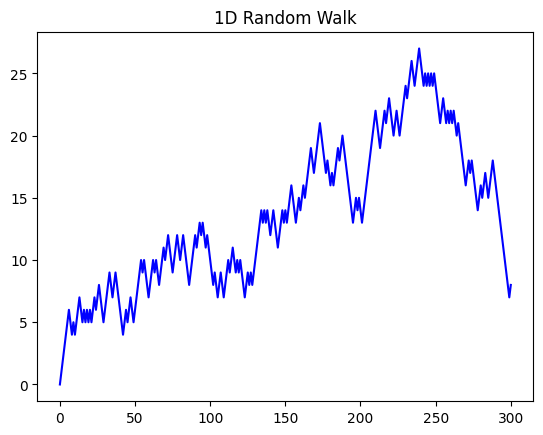

ValueError: ignored

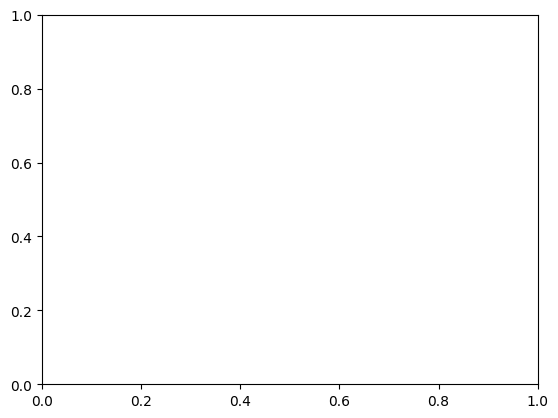

In [ ]:
path = randomwalk1D(300)

plt.plot(path, 'b-')
plt.title("1D Random Walk")
plt.show()

### Let's look at the properties of this process:

Let's take a partion of the interval $0=t_0 < t_1 < \dots < t_n = T$.

The discrete-time stochastic process $S_{t_0}, S_{t_1}, S_{t_2}, \dots $ satisfies for any time:
- independent increments: $(S_{t_1}-S_{t_0}), (S_{t_2}-S_{t_1}), (S_{t_3}-S_{t_2}), \dots$
- $E(S_{t_{i+1}}-S_{t_i})=0$
- variance accumulates at rate one per unit time: $Var(S_{t_{i+1}}-S_{t_i})= t_{i+1}-t_i$



In [ ]:
mean = lambda x: round(np.mean(x),3)
[mean(time_slice) for time_slice in path[1:10]]

TypeError: ignored

In [ ]:
variance = lambda x: round(np.var(x),3)
[variance(time_slice) for time_slice in path[1:10]]

TypeError: ignored

#### What did we miss?

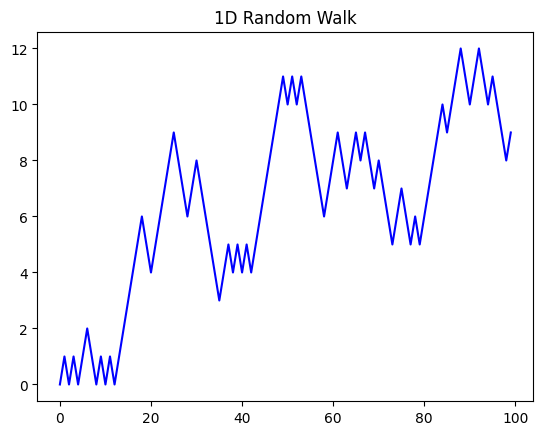

ValueError: ignored

In [ ]:
sim = 100
M = np.empty((sim, 0))
for k in range(0, sim, 1):
    pos_data = randomwalk1D(99)
    pos_data = np.array(pos_data).reshape(100,1)
    M = np.hstack((M,pos_data))

plt.plot(M);
plt.title("Simulated 1D Random Walks");

In [ ]:
[mean(time_slice) for time_slice in M[1:10]]

[-0.16, -0.3, -0.44, -0.3, -0.38, -0.34, -0.42, -0.24, -0.34]

In [ ]:
[variance(time_slice) for time_slice in M[1:10]]

[0.974, 2.03, 2.886, 3.63, 5.016, 6.564, 7.064, 7.782, 8.724]

- finite expected value: $E(|S_{t_n}|)< \infty$
- memoryless : $E(S_{t_{n+1}}| S_{t_0}, S_{t_2}, \dots, S_{t_n} )= S_{t_n} $ conditional expectation of next value in sequence is current position

Stochastic processes with the last two properties will be called a **discrete-time martingales**.



### Problems with the current model:
<div>
<img style="float: left;" src="images/crudeoil.jpg" width="350" />
<img style="float: right;" src="images/1Drandomwalk.png" width="350" />
</div>





1. discreteness: we usually think of an asset price as something evolving continously in time, at least while markets are open.

2. fixed unit increment: random walks only moves by a fixed unit. Asset prices can move by almost any dollar amount at all.

### Problems with the current model:



Fails to replicate:
- variance can increase very fast

- doesn't take into accound trends

- random walk tend to have negative values

This is not very realistic.

### Adressing the discreteness:


These observations suggest that we might find a better model by taking some kind of limiting case of the random walk as the size of the moves gets smaller but the frequency of the moves increase.

If we choose the time step to be infinitely small the variance goes to infinity. We have to scale down or shrink the size of moves.


CLT theorem says that if we take the sum $\sum_{t=1}^n X_t$ of i.i.d. random variables with zero mean and finite variance and divide it by it's standard diviation it would converge to something with a normal distribution.



Let's choose $\alpha = \sqrt{n}$ scaling factor and look at:

$$ S_t^{(n)}=\sum_{i=1}^{\lfloor nt \rfloor}\frac{X_i}{\sqrt{n}} $$

In [ ]:
import math

def scaledrandomwalk1D(n):
    t=10
    # Generate steps for time point [1, 2, 3, ... , n*t]
    coin_scaled = [-1/np.sqrt(n), 1/np.sqrt(n)] #Tails and head with scaling

    # Randomly select either UP or DOWN
    steps = np.random.choice(coin, size=(1,n*t))

    # Sum up the values
    path = np.cumsum(steps)
    # Add the starting point
    paths = np.concatenate([[0], path])

    return paths

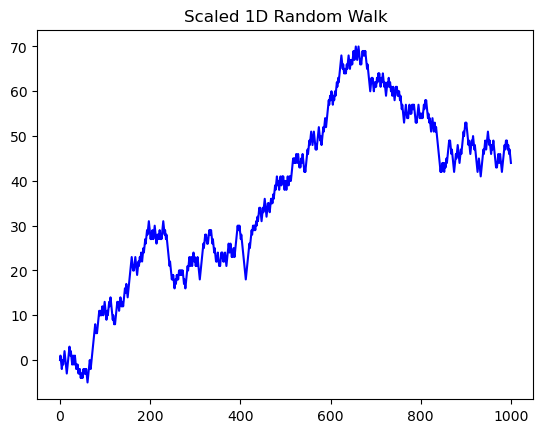

In [ ]:
path = scaledrandomwalk1D(100)

plt.plot(path, 'b-')
plt.title("Scaled 1D Random Walk")
plt.show()

In [ ]:
sim = 100
Mscaled = np.empty((sim, 0))
for k in range(0, sim, 1):
    pos_data = scaledrandomwalk1D(10)


In [ ]:
[mean(time_slice) for time_slice in Mscaled[1:10]]

[-0.032, -0.063, -0.032, -0.038, -0.038, 0.006, 0.019, -0.044, -0.101]

In [ ]:
[variance(time_slice) for time_slice in M[1:10]]

[0.99, 1.796, 2.888, 4.248, 5.284, 5.108, 5.97, 7.406, 8.27]

### Is it converging to something sensible?

### Yes, from Donsker's theorem we know that it is converging to a Brownian motion (Wiener process) as $ n \rightarrow \infty $.

$$ S_t^{(n)} \rightarrow W_t$$

In the sense of "weak convergence of stochastic processes".

Brownian motion is a continous time stochastic process, conventionally denoted as $W_t$ or $B_t$ with the following properties:

Let's take a partition  of the interval: $0< t_0 < t_1 < \dots < t_{n-1} < t_{n} = T$:

1. $W_0$ = 0
2. independent increments: $(W_{t_1}-W_{t_0}), (W_{t_2}-W_{t_1}), (W_{t_3}-W_{t_3}), \dots $
3. the distribution of the increments is normal: $W_{t_2}-W_{t_1} \sim N(0,t_2-t_1)$ for any $t_1<t_2$
4. has continous sample paths (almost surely)

![wiener.jpg](attachment:wiener.jpg)
                                                                                     

### Further properties:

Let's take a partition  of the interval: $0< t_0 < t_1 < \dots < t_{n-1} < t_{n}  = T$
- Brownian motions does not have bounded variation for an arbitrary small partion of the interval:
$$ \sum_{i=0}^{n} |W_{t_{i+1}} - W_{t_{i}}| \rightarrow \infty $$
- a stronger property is also true: Wiener process is nowhere differentiable!

![ito_calculus.png](attachment:ito_calculus.png)

### Further properties:
 For a partion $P$ of the interval $0< t_0 < t_1 < \dots < t_{n-1} < t_{n} = T$
- Wiener process has bounded quadratic variation:
$$ Q_{P} := \sum_{i=0}^n (W_{t_{i+1}} - W_{t_{i}})^2$$
then
$$ E(Q_P) := lim_{n \rightarrow \infty}  \sum_{i=0}^n (W_{t_{i+1}} - W_{t_{i}})^2 = T$$

 In other words, the Wiener process accumulates quadratic variation at a rate of one unit per time.  

 This is perhaps surprising result because it can be any path. It doesn't matter how the "infinitely fast" coin flips land, the sum of the square increments will always approach the length of the interval.

In [ ]:
def brownianmotion(n):
    t = 100 # time
    dt = t/n # time step

    # Simulate normal distributed variable
    steps = np.random.normal(0, np.sqrt(dt), size=(1,n-1))

    # Sum up the values
    path = np.cumsum(steps)
    # Add the starting point
    paths =  np.append([0],path)

    return paths

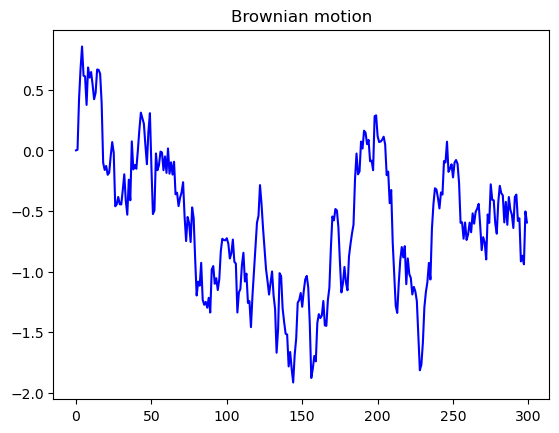

In [ ]:
bm = brownianmotion(300)
plt.plot(bm, 'b-');
plt.title("Brownian motion");

In [ ]:
sim = 100
bm_paths = np.empty((sim, 0))
for k in range(0, sim, 1):
    bm = brownianmotion(100)
    bm = np.array(bm).reshape(100,1)
    bm_paths = np.hstack((bm_paths,bm))

In [ ]:
[mean(time_slice) for time_slice in bm_paths[1:10]]

[-0.04, -0.018, -0.012, -0.071, -0.043, -0.078, -0.062, -0.084, -0.031]

In [ ]:
[variance(time_slice) for time_slice in bm_paths[1:10]]

[0.111, 0.234, 0.375, 0.434, 0.499, 0.544, 0.578, 0.702, 0.838]

In [ ]:
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
[quadratic_variation(time_slice) for time_slice in bm_paths.T[:10]]

[8.679, 11.029, 8.159, 6.092, 12.302, 13.073, 10.685, 8.383, 9.28, 11.277]

### Problems with the current model:

1. discreteness: solved

2. fixed unit increment: solved

3. fails to replicate:
- variance can increase very fast:mostly solved

- doesn't take into accound trends

- random walk tend to have negative values

- size of the moves does not scale with the price level
( a \$10 move is just as likely for an asset trading at 15 as one trading at 250.)







### Adding a trend

We want to think that the company (hence the asset price) is going to grow.

Add a term to the Brownian motion that represents a trend and a volatility factor:

$$W_{t; \mu, \sigma} = \mu t + \sigma W_t$$

This will be called **Brownian motion with a drift**, with $\mu t $ drift and $\sigma $ volatility.

Note that $\mu$ and $\sigma$ can also be time dependent.

<div>
<img src="images/browniandrift.jpg" width="450" />
</div>

##### Non-negative values and moves that scale with price level?

### Scaling and negative price

#### Idea:

Let's condiser and model changes in $\log (S_t)$ and let $\psi(t) = log(S_t)$.

$$ S_t = e^{\psi (t)}$$

Price is non-negative.



If $ \psi (t+1)= \psi (t) + \delta $ then
$$ S_{t+1} = e^{\psi (t+1)} = e^{\psi(t)+\delta} = e^{\delta}e^{\psi(t)} = e^{\delta}S_t$$

This is a multiplicative updating, scales with price.  So the price change can be written:

$$ S_{t+1} - S_t = e^{\delta}S_t - S_t = (e^{\delta}-1)S_t $$

So a fixed additive move in $\log (S_t)$ implies a price move that scales with price level.

These considerations lead us to consider modelling $\log(S_t)$ as a Brownian motion rather than $S_t$ itself:

$$ \log(S_t) = \mu t + \sigma W_t $$


                


Also, an initial value $S_0$ should be included:

$$ \log(S_t) = \log(S_0) + \mu t + \sigma W_t$$

We exponenciate both sides:

$$ S_t = S_0  e^{\mu t + \sigma W_t} $$

This model is called the **Geometric Brownian motion**.

### Is it good enough?

In [ ]:
import math

def geometricbrownianmotion(n, S0, mu, sigma, t):
    dt = t/n # time step

    # Simulate the variable
    St = np.exp(
        (mu-sigma**2/2)*dt + sigma * np.random.normal(0, np.sqrt(dt), size=(1,n)).T
    )
    #include array of 1's
    St = np.vstack([np.ones(1), St])

    # Move the object
    St = S0 * St.cumprod(axis=0)

    time = np.linspace(0,t, n+1)

    return time, St


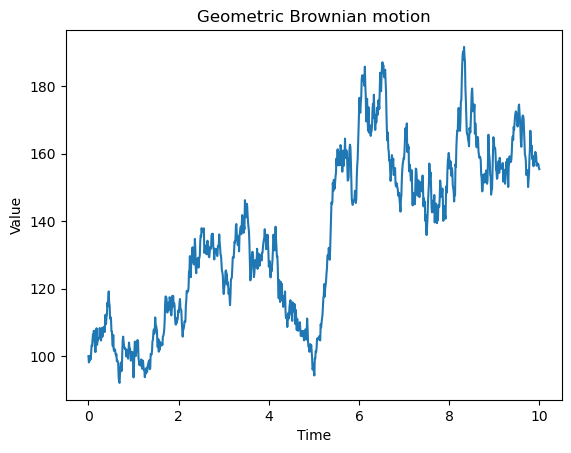

In [ ]:
mu = 0.1
sigma = 0.2
S0 = 100
n = 1000 #increase n
t=10
tt, St = geometricbrownianmotion(n, S0, mu, sigma, t)
plt.plot(tt, St) ;
plt.title("Geometric Brownian motion")
plt.xlabel("Time");
plt.ylabel("Value");

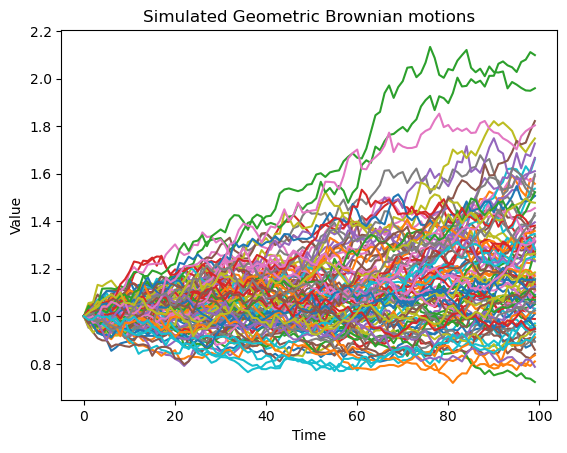

In [ ]:
sim = 100
gbm_paths = np.empty((sim, 0))
for k in range(0, sim, 1):
    tt, gbm = geometricbrownianmotion(99, 1, 0.15, 0.2, 1)
    gbm_paths = np.hstack((gbm_paths,gbm))
plt.plot(gbm_paths);
plt.title("Simulated Geometric Brownian motions")
plt.xlabel("Time");
plt.ylabel("Value");

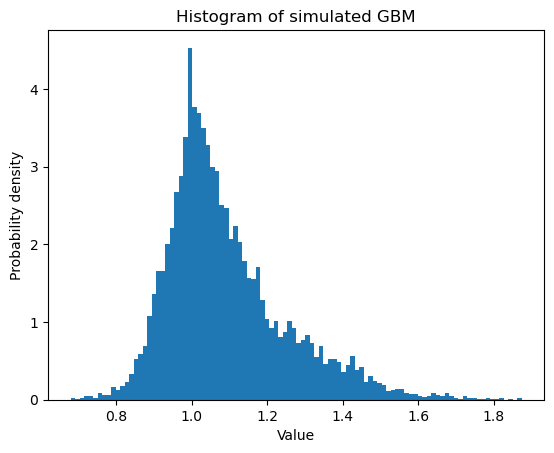

In [ ]:
#plot histogram
gbm_paths = np.array(gbm_paths).reshape(sim*sim,1)
plt.title("Histogram of simulated GBM", loc='center')
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.hist(gbm_paths, bins=100, density=True)
plt.show()

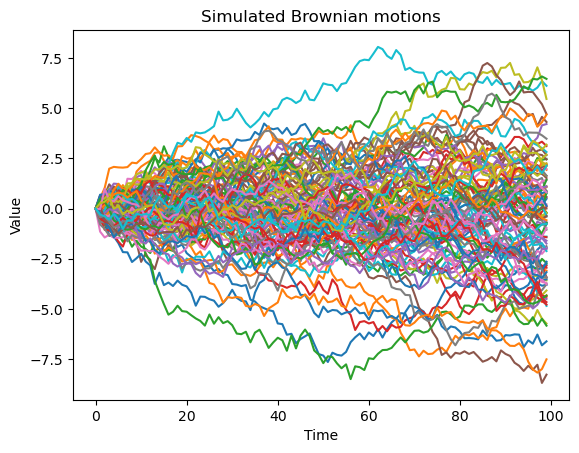

In [ ]:
plt.plot(bm_paths);
plt.title("Simulated Brownian motions")
plt.xlabel("Time");
plt.ylabel("Value");

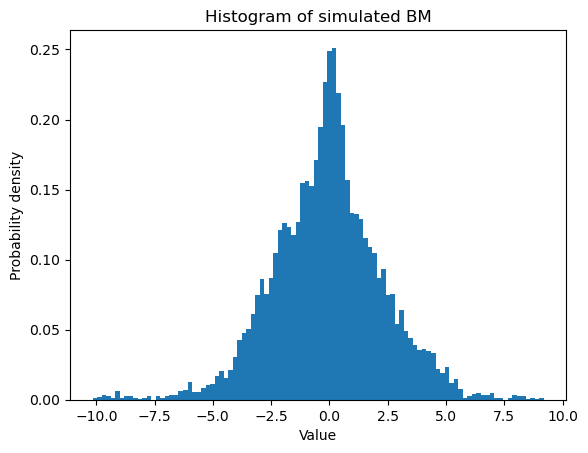

In [ ]:
#plot histogram
bm_paths = np.array(bm_paths).reshape(sim*sim,1)
plt.title("Histogram of simulated BM", loc='center')
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.hist(bm_paths, bins=100, density=True)
plt.show()

Initially we wanted to model the value of the portfolio.

If we take $ S_t = S_0  e^{\mu t + \sigma W_t} $ the change (**derivate**) in the asset price

$$ \frac{d S_t}{dt} = \left[ \mu + \sigma \frac{d W_t}{dt}\right] S_0  e ^{\mu t + \sigma W_t} =  \left[\mu + \sigma \frac{dW_t}{dt}\right] S_t = \mu S_t + \sigma S_t \frac{d W_t}{dt} $$




    
In differential form:

$$ d S_t = \mu S_t dt  + \sigma S_t d W_t$$

### What is the derivate of the Brownian motion?

<div>
<img style="float: right;" src="images/derivate.png" width="300"/>
<img style="float: left;" src="images/integral.png" width="300"/>
</div>

### Stochastic calculus

- Problems: Brownian motion is not differentiable at any given point
- Ordinary calculus: Differentiation (gradient) $\rightarrow$ Integration (area)
- Stochastic calculus: Ordinary calculus + randomness, Integration $\rightarrow$ Differentiation

- How to define:
$$ \int_{0}^{T} S_t d W_t = ? $$

- Plots from *Lessons in Industrial Automation*





### Rieman approach
- $\int_{a}^b f(t)dt$
- partition:
$$ P_{n} = \{t_{0}, t_1, \dots, t_n\} $$
- sums:
$$L(P_n, f) = \sum_{i=1}^{n}f(t_{i-1})(t_i - t_{i-1}), U(P_n, t) = \sum_{i=1}^{n}f(t_{i})(t_i - t_{i-1})$$


### Stieltjes approach
- $g(t)$: monotonic and bounded variation
- $\int_{a}^b f(t)dg(t)$
- sums:
$$L(P_n, f,g) = \sum_{i=1}^{n}f(t_{i-1})(g(t_i) - g(t_{i-1})) $$
$$U(P_n, f,g) = \sum_{i=1}^{n}f(t_{i})(g(t_i) - g(t_{i-1}))$$



![riemann_vs_stieltjes.png](attachment:riemann_vs_stieltjes.png)

<div>
<img style="float: left;" src="images/stochasticint2.png" width="400"/>
</div>

### Stochastic integral
For any partioning $0 = t_0 < t_1 < \dots < t_n= T $ of the interval $[0, T]$ we can form the sum:

 $$ \sum_{j=0}^n X_{t_j} (W_{t_{j+1}} - W_{t_j}) $$

 which defines a random number.


It can be shown that, under suitable continuity and boundedness conditions, these properties guarantee that one can indeed define a stochastic integral by the formula


$$ \int_{0}^{T} X_t d W_t = \lim_{n \rightarrow \infty} \sum_{j=0}^n X_{t_j} (W_{t_{j+1}} - W_{t_j}) $$

The limit is understood in the
stochastic sense of convergence in probability.

Basic rules for stochastic integration:

1. Telescope rule:
$$ \int_0^T dW_t = W_T - W_0$$

2. Linearity with respect to the integrand:

$$ \int_0^T (a X_t + b Y_t)dW_t  = a \int_0^T X_t dW_t + b \int_0^T Y_t dW_t$$

3. Linearity with respect to the integrator:

$$ \int_0^T  X_t d(a Y_t + b W_t)  = a \int_0^T X_t dY_t + b \int_0^T Y_t dW_t$$



#### Problem:
Calculation by definition is time consuming and non-trivial.

### Example

$$ \int_0^{T}W_t dW_t= ?$$



We know that for $0< t_0 < t_1 < \dots < t_{n-1} < t_{n} = T$:  

$$ \int_{0}^{T} W_t d W_t = \lim_{n \rightarrow \infty} \sum_{i=0}^{n} W_{t_i} (W_{t_{i+1}} - W_{t_i}) $$




$$  \sum_{i=0}^{n} W_{t_i} (W_{t_{i+1}} - W_{t_i}) =  \sum_{i=0}^{n} \frac{1}{2}( W_{t_{i+1}}+W_{t_i})(W_{t_{i+1}}-W_{t_{i}}) (W_{t_{i+1}} - W_{t_i})  $$


$$ = \sum_{i=0}^{n} \frac{1}{2} (W_{t_{i+1}}^2 - W_{t_i}^2) - \frac{1}{2}(W_{t_{i+1}}-W_{t_i})^2 $$

Applying the telescope rule and that $W_0=0$, we get that the first term is $\frac{1}{2} W_{t_n}^2$.

Due to the bounded quadratic variation of the Brownian motion:

$$ \frac{1}{2}\sum_{i=0}^{n}(W_{t_{i+1}}-W_{t_i})^2 \rightarrow \frac{T}{2}$$

So the integral becomes:

$$ \int_0^{T}W_t dW_t= \frac{1}{2}(W_t^2-T)$$

### Processes defined by stochastic integrals

In the trading interpretation the result is monitored continuously rather than just over a fixed
period. In the beginning of this lecture we introduced a model for the **value process** of the portfolio:
$$ Y_T = Y_0 + \int_0^T \phi_t dS_t $$

In economic terms, $Y_t$ can be viewed as the wealth process that is generated from a given asset price process $S_t$ by the application of a
trading strategy $ \phi_t$.

In differential form:
$$ dY_t =  \phi_t dS_t $$


### Let's go back to ordinary calculus

The Fundamental theorem of calculus says that if $f$ is a differentiable function:

$$f(t)=f(0) + \int_0^T f'(t)dt $$

It states that the two basic operations
of calculus, integration and differentiation, are each other’s inverse. The rule above may also be written in the form:

$$df(t)=f'(t)dt $$







This means that the change in $f$ is *proportial* to the change in $t$.
For small changes in the variable, second-order and higher terms are negligible compared to the first-order terms.

![taylor.png](attachment:taylor.png)



Using Taylor expansion of $f(t)$ around $a$:

$$f(t)=f(a)+(t-a)\frac{\partial f}{\partial t}(a)+\dots$$

$$f(t)-f(a)=(t-a)\frac{\partial f}{\partial t}(a)+\dots$$

$dt$ means change in $t$:

$$dt=\frac{\partial f}{\partial t}dt+\dots$$

As $dt\rightarrow 0$ higher order terms converge to 0:

$$dt=\frac{\partial f}{\partial t}dt$$



### Can we derive a formula for stochastic derivates in a similar way?

If $f(t,x)$ is a twice-differentiable function, using the Taylor series expansion:

$$ df =\frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x}dx +\frac{1}{2}\frac{\partial^2 f}{\partial t^2}dt^2+ \frac{1}{2}\frac{\partial f}{\partial t}\frac{\partial f}{\partial x}dt dx+ \frac{1}{2}\frac{\partial f}{\partial x}\frac{\partial f}{\partial t}dx dt +\frac{1}{2}\frac{\partial^2 f}{\partial x^2}dx^2 +\dots$$

All the second order and higher terms tend to zero much faster than the first order terms and are dropped. So in the limit, this becomes:

$$df =\frac{\partial f}{\partial t}dt+\frac{\partial f}{\partial x}dx$$



Substituting $S_t$ for $x$ we get:

$$ df =\frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial S_t}dS_t +\frac{1}{2}\frac{\partial^2 f}{\partial t^2}dt^2+ \frac{1}{2}\frac{\partial f}{\partial t}\frac{\partial f}{\partial S_t}dt dS_t+ \frac{1}{2}\frac{\partial f}{\partial S_t}\frac{\partial f}{\partial t}dS_t dt +\frac{1}{2}\frac{\partial^2 f}{\partial S_t^2}dS_t^2 +\dots$$

Since $$ dS_t = \mu dt +\sigma dW_t $$

$$ df =\frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial S_t}( \mu dt +\sigma dW_t) +\frac{1}{2}\frac{\partial^2 f}{\partial t^2}dt^2+ \frac{1}{2}\frac{\partial f}{\partial t}\frac{\partial f}{\partial S_t}dt ( \mu dt +\sigma dW_t)+ \frac{1}{2}\frac{\partial f}{\partial S_t}\frac{\partial f}{\partial t}( \mu dt +\sigma dW_t) dt +\frac{1}{2}\frac{\partial^2 f}{\partial S_t^2}( \mu^2 dt^2 + 2\mu \sigma dt dW_t +\sigma^2 dW_t^2) +\dots$$

> Rules of stochastic calculus:
> - $(dW_t)^2 = dt$
> - $dt dW_t = 0$
> - $(dt)^2=0$

$$df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial S_t}( \mu dt +\sigma dW_t)  +\frac{1}{2}\frac{\partial^2 f}{\partial S_t^2}(\sigma^2 dt) $$

$$ df(S_t) = \mu \frac{\partial f}{\partial S}(S_t)dt  +\sigma \frac{\partial f}{\partial S}(S_t) dW_t +\frac{1}{2} \sigma^2 \frac{\partial^2 f}{\partial S^2}(S_t) dt $$

### Ito process

In the general case we will be interested in a special class of stochastic processes called **Ito drift diffusion processes**:

$$ S_t = X_0 + \int_0^T \mu(t, S_t) dt+ \int_0^T \sigma(t, S_t) dW_t $$

where the first term is a Riemann integral (drift term) and the second one is a stochastic integral (diffusion term).

In differential form:

$$ dS_t = \mu_t dt +\sigma_t dW_t $$

If $f(t)$ is a twice continously differentiable function:
$$ df(S_t) = \mu_t \frac{\partial f}{\partial S}(S_t)dt  +\sigma_t \frac{\partial f}{\partial S}(S_t) dW_t +\frac{1}{2} \sigma_t^2 \frac{\partial^2 f}{\partial S^2}(S_t) dt $$

Which in integral form:



$$f'(S_t) = f(S_0) + \int_0^T \mu_ t f'(S_t)dt +\int_0^T \sigma_ t f'(S_t)dW_t + \frac{1}{2} \int_0^T \sigma_t^2 f''(S_t)dt $$




$$f '(S_t) = f(S_0) + \int_0^T f'(S_t)dS_t + \frac{1}{2} \int_0^T \sigma_t^2 f''(S_t)dt $$

Is called **Ito's formula (Ito's lemma)**.

### Back to the previous example

$$\int_0^T W_t dW_t=?$$

We know that: $f(S_t) = f(S_0) + \int_0^T \mu_ t f'(S_t)dt +\int_0^T \sigma_ t f'(S_t)dW_t + \frac{1}{2} \int_0^T \sigma_t^2 f''(S_t)dt $




Let us represent the Brownian motion as an Ito process:

$ \mu_t = 0$, $\sigma_t=1$ and $f(t)=t^2$, $S_t=W_t$

$$W_t^2 = W_0^2 + \int_0^T 2 W_t d W_t +\frac{1}{2} \int_0^T 2 dt$$


So we get:

$$\int_0^T W_t dt = \frac{1}{2}(W_t^2-t)$$

### Back to the geometric Brownian motion


The representation of $S_t$ as an Ito process:

$ \mu_t = \mu, \sigma_t = \sigma$
$$S_t= S_0 +\int_{0}^T \mu S_t dt +\int_0^T \sigma S_t d W_t$$


Using the Ito's formula for $f(t)=\log t$:

$$\log S_t = \log S_0 + \int_0^T \frac{1}{S_t}(\mu S_tdt+\sigma S_t dW_t)+\frac{1}{2}\int_0^T -\frac{1}{S_t^2}\sigma^2 S_t^2dt$$

$$= \log S_0 + \sigma W_t +(\mu-\frac{\sigma^2}{2})t  $$

From here:

$$S_t=S_0 \cdot e^{\sigma W_t+(\mu - \frac{\sigma^2}{2})t}$$

### Summary

- value process of the portolfio:

$$ Y_T = Y_0 + \int_0^T \phi_t^T dS_t$$

- model the asset price:

$$log(S_t) = \mu t +\sigma W_t $$

$$S_t = S_0 e^{\mu t +\sigma W_t} $$

- changes in the asset price can be viewed as:

$$dS_t = \mu S_t + \sigma S_t dW_t$$



### Summary

- define integration with respect to a stochastic process:



$$\int_0^T X_tdW_t = \lim_{n \rightarrow \infty} \sum_{j=0}^n X_{t_j}(W_{t_{j+1}}-W_{t_j})$$


- when $S_t$ is a drift diffusion process Ito's rule can be used to calculate the derivate:

$$f'(S_t) = f(S_0) + \int_0^T \mu_ t f'(S_t)dt +\int_0^T \sigma_ t f'(S_t)dW_t + \frac{1}{2} \int_0^T \sigma_t^2 f''(S_t)dt $$

### We have a model for the asset price and a way to calculate changes in the portfolio value !!!

### References

- Cameron Connell, *Financial Derivatives course*, accessed on 2023 August

- Peter Kevei, *Financial mathematics lecture notes* (University of Szeged, 2020)

- QuantPy youtube channel, accessed on 2023 August

- Schumacher, J. M., *Introduction to Financial Derivatives*, (Open Press TiU, 2020)

- Tony R. Kuphaldt, *Lessons in Industrial Automation*, Control Aumation, accessed on 2023 August

- Vladimir Ilievsky, *Integrals are Fun - Illustrated Riemann-Stieltjes Integral*, iSquared, accessed on 2023 August






In [ ]:
import numpy as np
from scipy.stats import norm


HOMEWORK IMPLEMENTATION: Task B

- Upgraded the BSM call option pricer to be able to return the
greeks as well, not just the price.

In [ ]:
def bsm_call_option(S, K, T, r, sigma, return_greeks=False):
    """
    Parameters:
    S : float
        Stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate (annualized)
    sigma : float
        Volatility of the underlying (annualized)
    return_greeks : bool
        Flag to return Greeks along with the price

    Returns:
    float
        Call option price
    dict (optional)
        Dictionary containing Greeks if return_greeks is True
    """
    # Black-Scholes-Merton formula components
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Call option price
    call_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))

    if return_greeks:
        # Calculating Greeks
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        vega = S * norm.pdf(d1) * np.sqrt(T)
        theta = - (S * sigma * norm.pdf(d1)) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)

        greeks = {'delta': delta, 'gamma': gamma, 'vega': vega, 'theta': theta, 'rho': rho}
        return call_price, greeks

    return call_price


In [ ]:
price, greeks = bsm_call_option(S=100, K=100, T=1, r=0.05, sigma=0.2, return_greeks=True)
print("Call Price:", price)
print("Greeks:", greeks)


Call Price: 10.450583572185565
Greeks: {'delta': 0.6368306511756191, 'gamma': 0.018762017345846895, 'vega': 37.52403469169379, 'theta': -6.414027546438196, 'rho': 53.232481545376345}


# HOMEWORK IMPLEMENTATION : Task C

- Implemented the BSM pricer for European put option.


In [ ]:
def bsm_put_option(S, K, T, r, sigma):
    """
    Parameters:
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate (annualized)
    sigma : float
        Volatility of the underlying (annualized)

    Returns:
    float
        Put option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price


In [ ]:
put_price = bsm_put_option(S=100, K=100, T=1, r=0.05, sigma=0.2)
print("Put Price:", put_price)


Put Price: 5.573526022256971


# HOMEWORK IMPLEMENTATION : Task D

- Implemented Put-Call parity hold checker

In [ ]:
def check_put_call_parity(call_price, put_price, S, K, T, r):
    """
    Parameters:
    call_price : float
        Price of the European call option
    put_price : float
        Price of the European put option
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate (annualized)

    Returns:
    bool
        True if Put-Call Parity holds, False otherwise
    """
    left_side = call_price - put_price
    right_side = S - K * np.exp(-r * T)

    # Check if parity holds within a small tolerance
    tolerance = 1e-5
    return abs(left_side - right_side) < tolerance


In [ ]:
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to maturity (1 year)
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Volatility

call_price = bsm_call_option(S, K, T, r, sigma)
put_price = bsm_put_option(S, K, T, r, sigma)

if check_put_call_parity(call_price, put_price, S, K, T, r):
    print("Put-Call Parity holds.")
else:
    print("Put-Call Parity does not hold.")


Put-Call Parity holds.
